# functionality for plotting data of one evaluation scenario

In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp
import glob
import os
from omegaconf import OmegaConf

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('bmh')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'

In [80]:


def plot(dfs, key='episode_reward', xlabel='training step', ylabel='episode reward', lines=['1', '2']):
    for i, df in enumerate(dfs):
        data = df
        sns.lineplot(x='step', y=key, data=data, errorbar='sd', linewidth=1, label=lines[i])
    plt.rcParams['text.usetex'] = True
    plt.tight_layout()
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend( prop={'size': 9})#, loc='upper right')
    plt.gca().set_facecolor((1,1,1))
    plt.show()



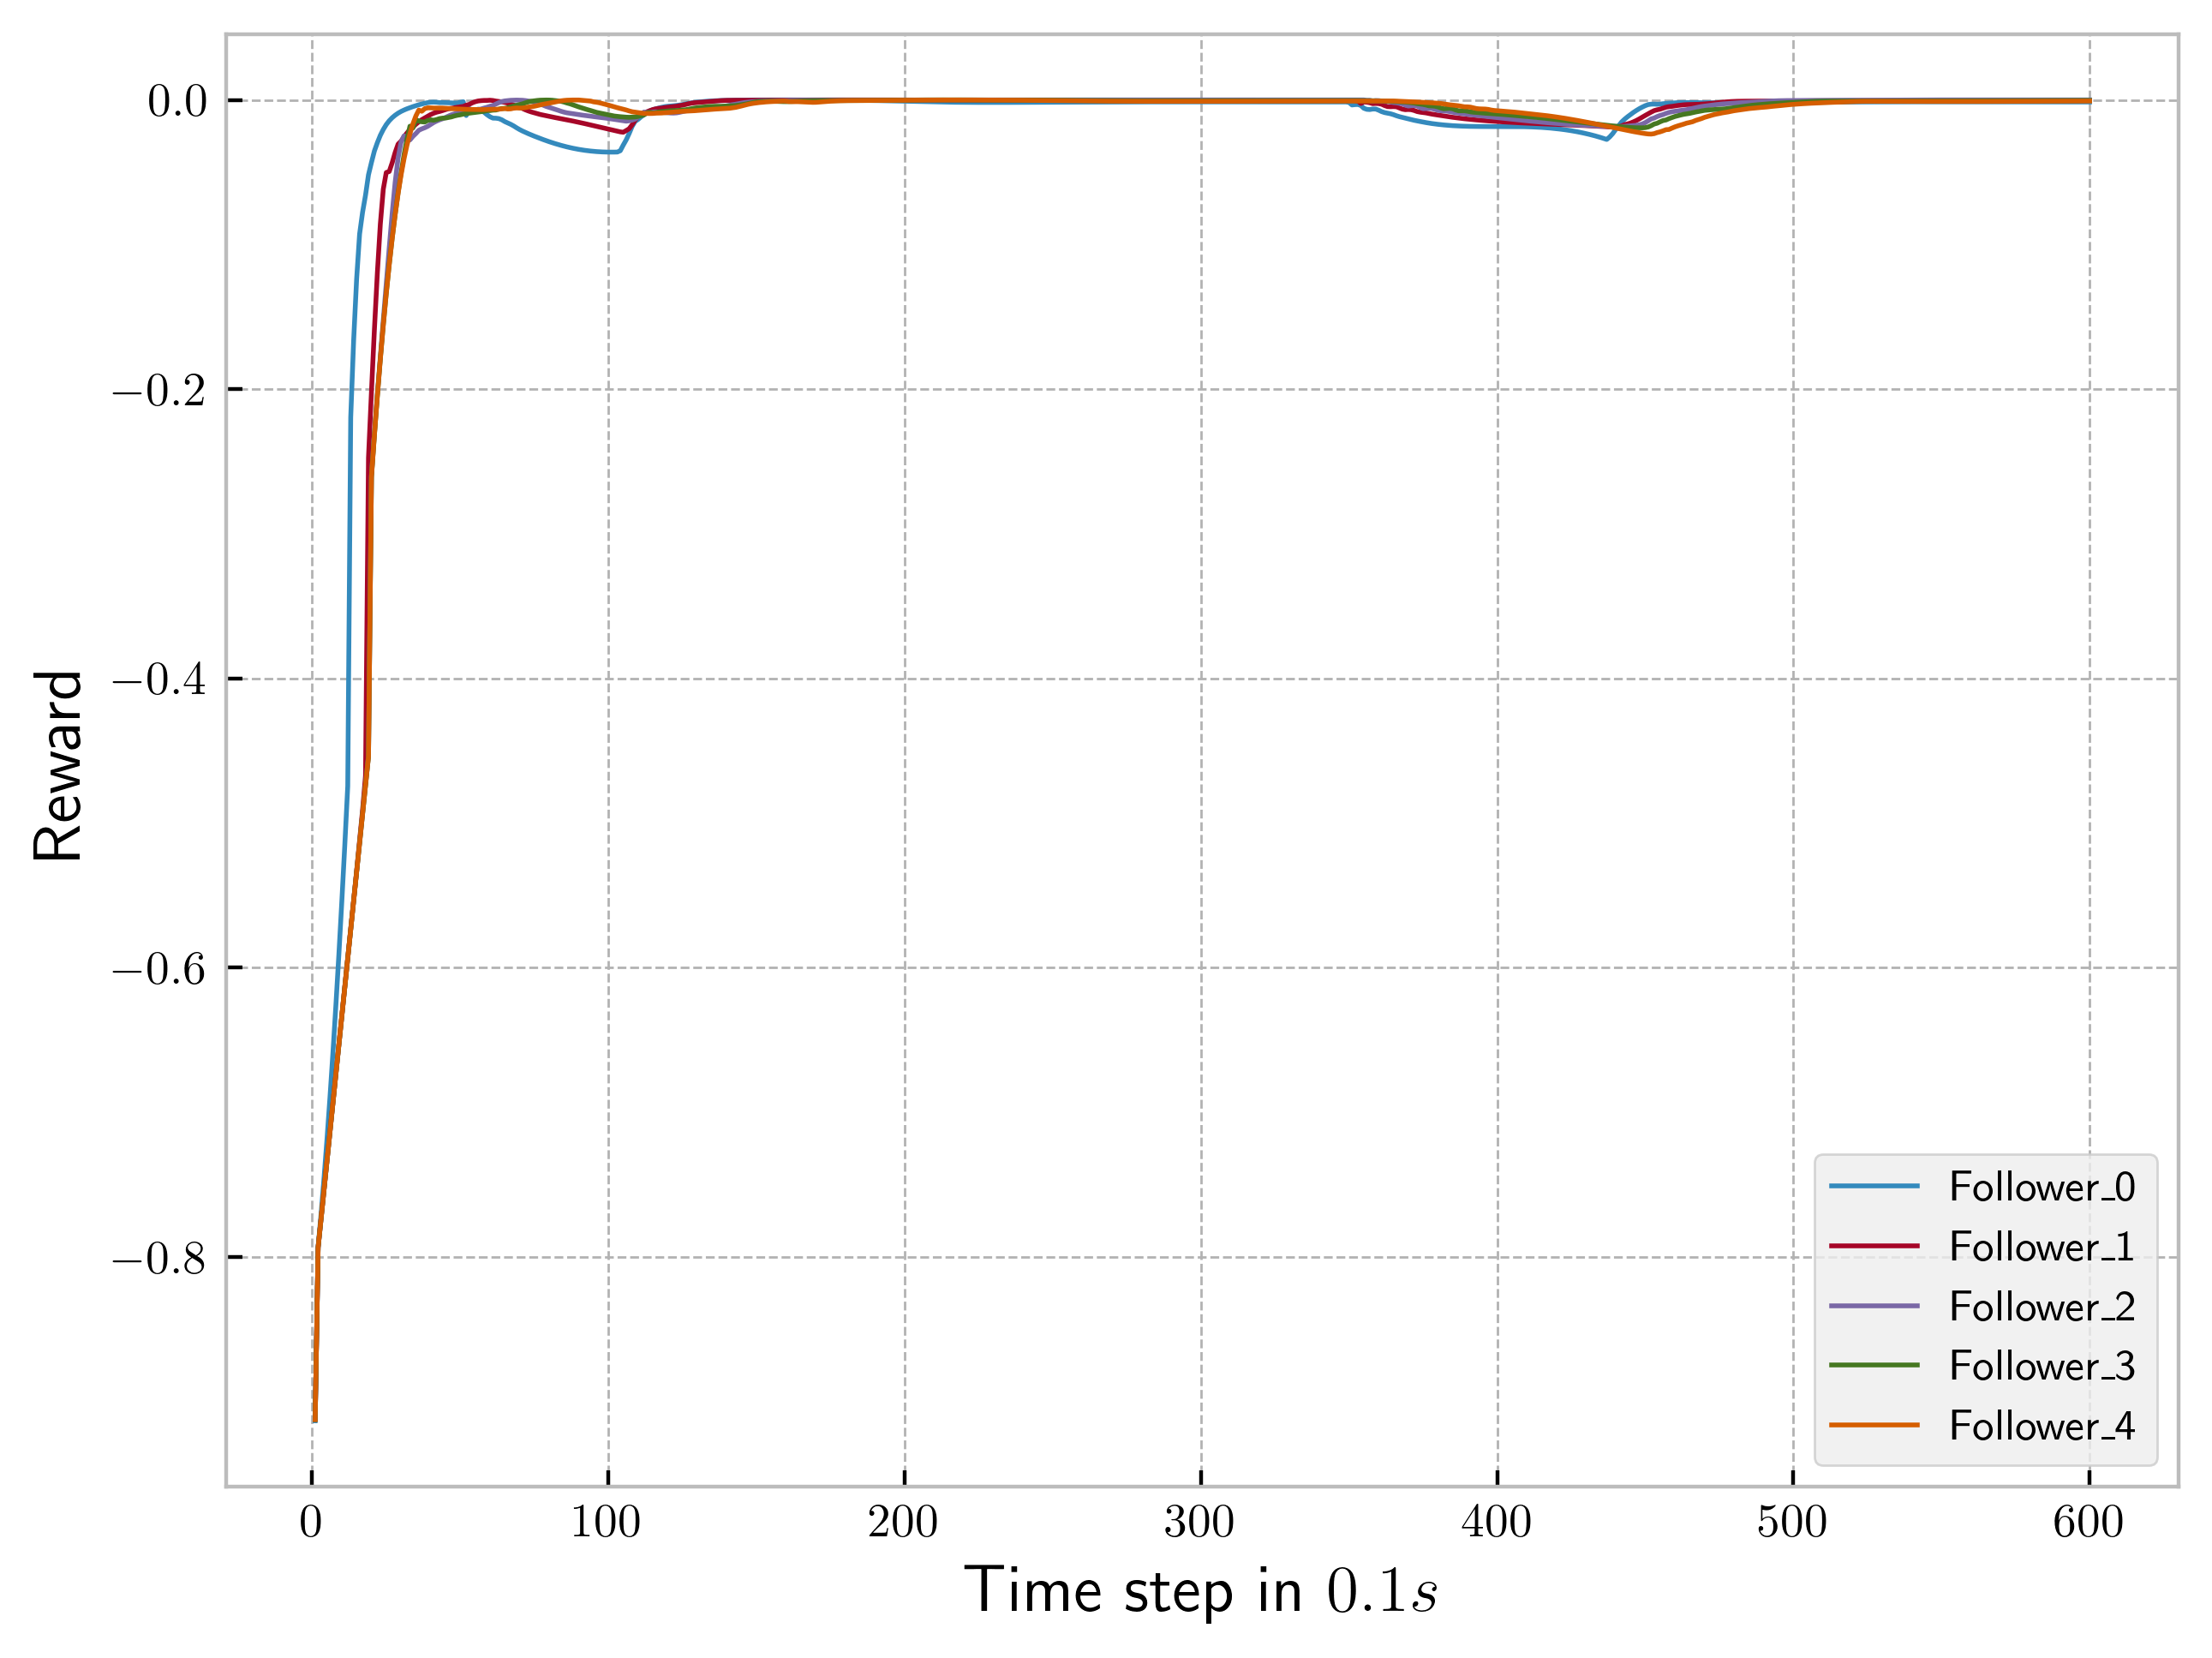

In [84]:
path = '../exp/path_to_evaluation-run/'
scenario = '2'

key = 'reward'
xlabel = 'Time step in $0.1s$'
ylabel = 'Reward'
file_name = 'eval_reward_data.csv'
leader_file_name = 'eval_leader_data.csv'
include_leader = False

names = ['Follower_0', 'Follower_1', 'Follower_2', 'Follower_3', 'Follower_4']
agent_ids = ['follower0_0', 'follower1_0', 'follower2_0', 'follower3_0', 'follower4_0']
file_paths = []
for agent_id in agent_ids:
    file_paths.append(path + agent_id + '-' + scenario + '_' + file_name)

if include_leader:
    file_paths.insert(0, path + 'leader-' + scenario + "_" + leader_file_name)
    names.insert(0, 'Leader')

dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)


plot(dfs, key, xlabel=xlabel, ylabel=ylabel, lines=names)